# **Задание**

**Цель**: изучить применение методов оптимизации для решения задачи классификации

**Описание задания**: В домашнем задании необходимо применить полученные знания в теории оптимизации и машинном обучении для реализации логистической регрессии.

# **Этапы работы**

***1. Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets
from pandas import DataFrame
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.datasets import load_iris

from datetime import datetime
from sklearn.linear_model import LogisticRegression

In [ ]:
iris = load_iris()

Посмотрим ключи, целевые названия ирисов и что у нас в данных и что это за данные

In [ ]:
keys = iris.keys()
keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [ ]:
list(iris.feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Но нам нужно только 2 класса: Iris Versicolor, Iris Virginica. И есть 2 пути:


1.   Преобразовать сам датасет
2.   Выбрать из датасета данные и целевые классы и "раскидать" их в параметры обучения



Для удобства манипулирования данными делаем из них DataFrame:

In [ ]:
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Теперь оставим только данные которые нам нужны: Iris Versicolor, Iris Virginica

In [ ]:
iris_frame.replace(['setosa'], [None], inplace=True)
iris_frame.dropna(inplace=True)
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


Проверяем что остались только нужные нам значения:

In [ ]:
iris_frame['name'].value_counts()

versicolor    50
virginica     50
Name: name, dtype: int64

Построим график распределения образцов по длине и ширине лепестка (например)

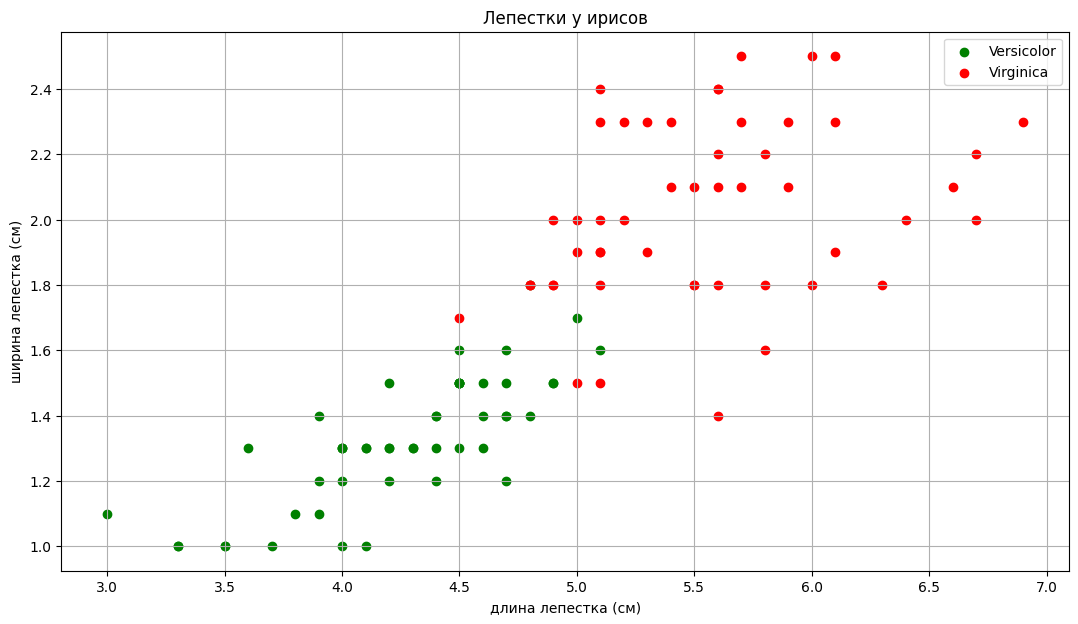

In [ ]:
versicolor = iris_frame[iris_frame.name == 'versicolor']
virginica = iris_frame[iris_frame.name == 'virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # Задаём размеры графика.

# Подписываем и отрисовываем точки.
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")

ax.set_xlabel("длина лепестка (см)")
ax.set_ylabel("ширина лепестка (см)")
ax.grid()
ax.set_title("Лепестки у ирисов")
ax.legend()

И теперь график по длине и ширине чашелистика

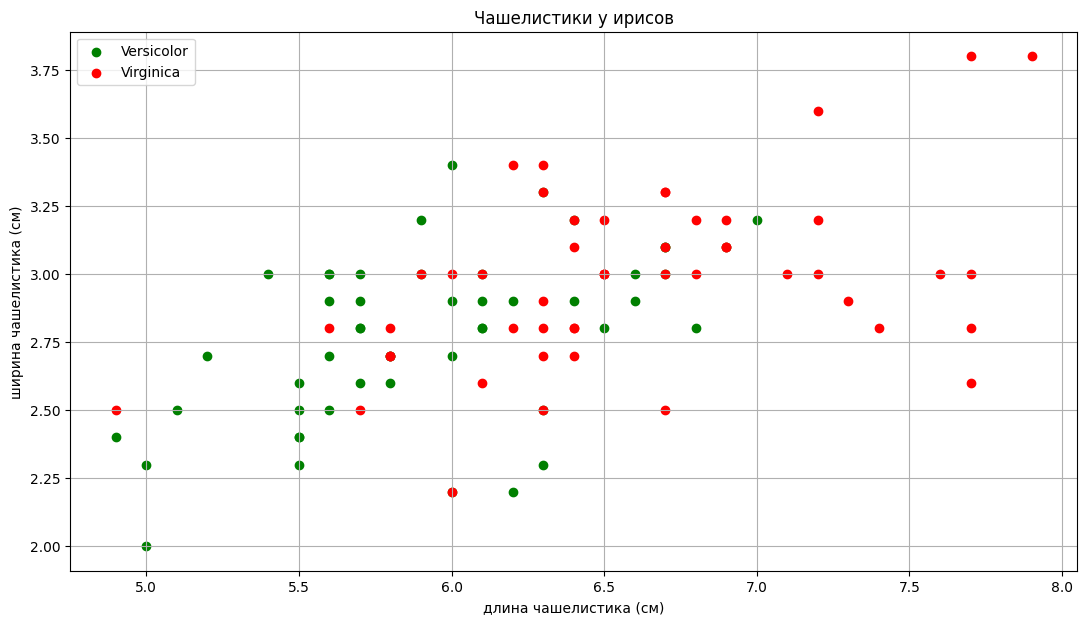

In [ ]:
versicolor = iris_frame[iris_frame.name == 'versicolor']
virginica = iris_frame[iris_frame.name == 'virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # Задаём размеры графика.

# Подписываем и отрисовываем точки.
ax.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], label="Virginica", facecolor="red")

ax.set_xlabel("длина чашелистика (см)")
ax.set_ylabel("ширина чашелистика (см)")
ax.grid()
ax.set_title("Чашелистики у ирисов")
ax.legend()



---



---



---



***2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. Оформите в виде класса с методами.***

 ***3. Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.***

***4. Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).***

***5. Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).***

In [ ]:
iris_frame['target'].value_counts()

1    50
2    50
Name: target, dtype: int64

In [ ]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
50,7.0,3.2,4.7,1.4,0,versicolor
51,6.4,3.2,4.5,1.5,0,versicolor
52,6.9,3.1,4.9,1.5,0,versicolor
53,5.5,2.3,4.0,1.3,0,versicolor
54,6.5,2.8,4.6,1.5,0,versicolor


In [ ]:
iris_frame['target'] = pd.factorize(iris_frame['target'])[ 0 ]

In [ ]:
#selectedColumns_1 = iris_frame[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
#selectedColumns_2 = iris_frame.loc[:, iris_frame.columns != 'target']

#X = pd.get_dummies(selectedColumns_1, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
#y = iris_frame[iris_frame.columns[-2]]

In [ ]:
class MyLogisticRegression():

  def train_test(self, X, y, test_size=1/3, rnd_state=0):
    np.random.seed(seed=rnd_state)
    ar1 = np.hstack((X, y))
    np.random.shuffle(ar1)
    r = int(ar1.shape[0] * test_size)
    X, y = ar[:, :4], ar[:, [4]]
    return X[r:], X[:r], y[r:], y[:r]

  def theta(self, theta, X):
    return theta[0] + theta[1] * X[:, 0] + theta[2] * X[:, 1] +\
      theta[3] * X[:, 2] + theta[4] * X[:, 3]

  def sigmoid(self, theta):
    return 1./(1 + np.exp(-theta))

  def predict(self, theta, X):
    return self.sigmoid(self.theta(theta, X))

  def loss_function(self, Y, sigmoid):
    return np.sum(np.square(sigmoid - Y)) / (2 * len(sigmoid))

  def predict_grad(self, X, Y, epochs, rate, theta):
    losses = []
    for _ in range(epochs):
      sigmoid = self.predict(theta, X)
      loss = self.loss_function(Y, sigmoid)
      losses.append(loss)
      theta[0] = theta[0] - rate * np.sum(sigmoid - Y) / len(sigmoid)
      theta[1] = theta[1] - rate * \
        np.sum((sigmoid - Y) * X[:, 0])/len(sigmoid)
      theta[2] = theta[2] - rate * \
        np.sum((sigmoid - Y) * X[:, 1])/len(sigmoid)
      theta[3] = theta[3] - rate * \
        np.sum((sigmoid - Y) * X[:, 2])/len(sigmoid)
      theta[4] = theta[4] - rate * \
        np.sum((sigmoid - Y) * X[:, 3])/len(sigmoid)
    return [theta, losses[0], losses[len(losses) - 1], self.count_errors(X, Y, theta)]

  def predict_rmsprop(self, X, Y, epochs, rate, epsilon, gamma, theta):
    grad = np.zeros(5)
    sq_grad = np.zeros(5)
    losses = []
    for _ in range(epochs):
      sigmoid = self.predict(theta, X)
      loss = self.loss_function(Y, sigmoid)
      losses.append(loss)
      grad[0] = np.sum(sigmoid - Y)/len(sigmoid)
      grad[1] = np.sum((sigmoid - Y) * X[:, 0])/len(sigmoid)
      grad[2] = np.sum((sigmoid - Y) * X[:, 1])/len(sigmoid)
      grad[3] = np.sum((sigmoid - Y) * X[:, 2])/len(sigmoid)
      grad[4] = np.sum((sigmoid - Y) * X[:, 3])/len(sigmoid)
      sq_grad = gamma * sq_grad + (1 - gamma) * grad ** 2
      theta -= rate * grad / np.sqrt(sq_grad + epsilon)
    return [theta, losses[0], losses[-1], self.count_errors(X, Y, theta)]

  def predict_nadam(self, X, Y, epochs, rate, gamma, theta):
    vt = np.zeros(5)
    vt_prev = np.zeros(5)
    losses = []
    for _ in range(epochs):
      sigmoid = self.predict(theta, X)
      loss = self.loss_function(Y, sigmoid)
      losses.append(loss)
      sigmoid = self.predict(theta - gamma * vt_prev, X)
      vt[0] = (gamma * vt_prev[0] + rate *
              np.sum(sigmoid - Y))/len(sigmoid)
      vt[1] = (gamma * vt_prev[1] + rate *
              np.sum((sigmoid - Y) * X[:, 0]))/len(sigmoid)
      vt[2] = (gamma * vt_prev[2] + rate *
              np.sum((sigmoid - Y) * X[:, 1]))/len(sigmoid)
      vt[3] = (gamma * vt_prev[3] + rate *
              np.sum((sigmoid - Y) * X[:, 2]))/len(sigmoid)
      vt[4] = (gamma * vt_prev[4] + rate *
              np.sum((sigmoid - Y) * X[:, 3]))/len(sigmoid)
      theta -= vt
      vt_prev = vt
    return [theta, losses[0], losses[len(losses) - 1], self.count_errors(X, Y, theta)]

  def count_errors(self, X, Y, theta):
    count = 0
    for index, item in enumerate(np.around(self.predict(theta, X))):
      # print(int(item), Y[index].item())
      if int(item) != Y[index].item():
        count += 1
    return count



df = iris_frame
df['target'] = iris_frame.target

df = df[df.target != 0]
mask = df.target == 2
df.loc[mask, 'target'] = 0
ar = np.array(df.iloc[:,:5])

# X - предикторы, y - отклики
X, y = ar[:, :4], ar[:, [4]]

In [ ]:
theta = np.asarray([ 0.30462999,  0.88700124, -0.46952468, -0.1319524 ,  0.28162746])
rg = MyLogisticRegression()
start_time = datetime.now()
print('Gradient')
print(rg.predict_grad(X, y, 50000, 0.001, theta))
print(f'ошибки: {rg.count_errors(X, y, theta)}')
print(f'потребоволось времени:  {datetime.now() - start_time}')


Gradient
[array([ 0.40339447,  1.4902756 , -0.1876572 ,  0.38288557,  0.47322605]), 0.0037750271209331964, 2.459859008693376e-09, 0]
ошибки: 0
потребоволось времени:  0:00:07.358736


In [ ]:
theta = [ 0.30462999,  0.88700124, -0.46952468, -0.1319524 ,  0.28162746]
rg = MyLogisticRegression()
start_time = datetime.now()
print('\nRMSProp')
print(rg.predict_rmsprop(X, y, 50000, 0.01, 0.9999, 0.99999, theta))
print(f'ошибки: {rg.count_errors(X, y, theta)}')
print(f'потребоволось времени:  {datetime.now() - start_time}')


RMSProp
[array([ 0.43503873,  1.67514399, -0.1002641 ,  0.54211718,  0.53270217]), 0.0037750271209331964, 4.0124508522043705e-11, 0]
ошибки: 0
потребоволось времени:  0:00:09.491305


In [ ]:
theta = [ 0.30462999,  0.88700124, -0.46952468, -0.1319524 ,  0.28162746]
rg = MyLogisticRegression()
start_time = datetime.now()
print('\nNesterov')
print(rg.predict_nadam(X, y, 50000, 0.01, 0.9, theta))
print(f'ошибки: {rg.count_errors(X, y, theta)}')
print(f'потребоволось времени:  {datetime.now() - start_time}')


Nesterov
[array([ 0.43530831,  1.67660958, -0.09958614,  0.54337778,  0.53316175]), 0.0037750271209331964, 3.8852722896418184e-11, 0]
ошибки: 0
потребоволось времени:  0:00:08.052087


In [ ]:
test_theta = np.random.normal(size=(5,))
test_theta




---


---



---



***6. Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.***

Рассмотрим время вополнения:
1.   Gradient - 0:00:07.358736
2.   RMSProp - 0:00:09.491305
3.   Nesterov - 0:00:08.052087

В целом сравнение показывает, что время работы методов при похожих начальных условиях отличаются незначительно, но нужно подобрать коэф. для скользящего среднего и Нестерова.


Ошибки отсутствуют (в качестве метрики качества модели)